In [1]:
import minna_functions as mf

In [2]:
import sqlite3
conn = sqlite3.connect('spotify.db')
c = conn.cursor()

In [3]:
c.execute('''DROP TABLE test''')

OperationalError: no such table: test

In [4]:
get_playlist = mf.get_spotify_playlist('BQAJunt_vGkgwy36sdTqjN2anGyFrZcf7InGV1u6LnXlqF6OTzfXgpctyx9bTO91-_R0WAebC6pPyvr5u_a721xAt-4FNUJiRisRg8WdAjcoBzqRhv2-eJPf7YMU05lzkAU8jDM-ff5l4cNKd6U')


In [5]:
temp = get_playlist.get_playlist_SQL('37i9dQZF1DX7QOv5kjbU68', 'test')

In [6]:
df = get_playlist.SQL_to_dataframe('test')

In [8]:
test_df = get_playlist.song_audio_features(df, 'test')

In [10]:
temp = get_playlist.get_playlist_SQL('2n13YFcOHztC02P6fzLCAs', 'test')

In [11]:
df = get_playlist.SQL_to_dataframe('test')

In [12]:
test_df = get_playlist.song_audio_features(df, 'test')

In [16]:
test_df

,song_name,song_id,popularity,artist_name,speechiness,danceability
index,,,,,,
1,Omertà,3kCwyvhvVTyehIzYN2I0nF,78,Drake,0.2980,0.646
2,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,93,Drake,0.0460,0.831
3,Lust For Life,1v24T2ug4TlssYZvI3aL4O,63,Drake,0.1750,0.462
4,Houstatlantavegas,3XLSlQLJf3Ut0zvMUxnF1h,62,Drake,0.0574,0.683
5,No Guidance (feat. Drake),7FEwp8BavoEVE3AnxJDchc,88,Chris Brown,0.1510,0.698
6,Successful (feat. Trey Songz & Lil Wayne),6NwhtCYkfwWlcR62Ac4E7y,64,Drake,0.3690,0.562
7,Let’s Call It Off (feat. Peter Bjorn and John),4FDSPGncHRpr6yB8DD4CtI,60,Drake,0.0327,0.790
8,November 18th,0JaVdpmiex2EP7bBzyKVTa,64,Drake,0.5070,0.749
9,Ignant Shit (feat. Lil Wayne),2hcohLIysMxofYziluXCoX,61,Drake,0.2760,0.591


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

Text(0.5, 1.0, 'drake songs dancieability vs. popularity')

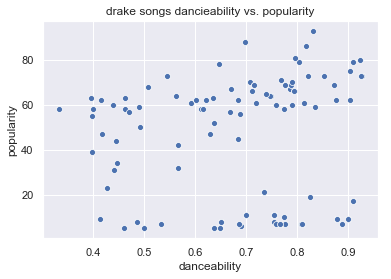

In [17]:
# ax = sns.scatterplot(x= drake_df['popularity'], y= drake_df['danceability'], data = drake_df)
# ax.set_title('drake songs popularity vs. danceability')

ax = sns.scatterplot(x=test_df["danceability"], y=test_df["popularity"], data = test_df)
plt.title('drake songs dancieability vs. popularity')